# Decision Trees - Visualization

In [49]:
import sklearn.datasets as datasets
import pandas as pd
import pydotplus

from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [65]:
D=datasets.load_digits()
print(D.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [60]:
print(D['DESCR'])

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [64]:
print(D['data'][10])

[ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]


In [63]:
print(D['images'][10])

[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]


Refer: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Parameters for a decision tree:
<ul>
    <li>splitter</li>
    <li>max_depth</li>
    <li>criterion</li>
    <li>max_features</li>
    <li>max_leaf_nodes</li>
    <li>min_impurity_decrease</li>
    <li>min_impurity_split</li>
    <li>min_samples_leaf</li>
    <li>min_samples_split</li>
    <li>min_weight_fraction_leaf</li>
    <li>presort</li>
    <li>random_state</li>
    <li>class_weight</li>
</ul>

In [5]:
import re
def remove_gini_impurity(graph_val):
    return re.sub(r'gini = (.*)<br/>s', "s", graph_val)

# Visualization of a Decision Tree

## First step (Depth=1)

In [67]:
#Initial distinction of one entire category
dtree=DecisionTreeClassifier(max_depth=1)
dtree.fit(D.data,D.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph_val = remove_gini_impurity(dot_data.getvalue())
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(graph_val)

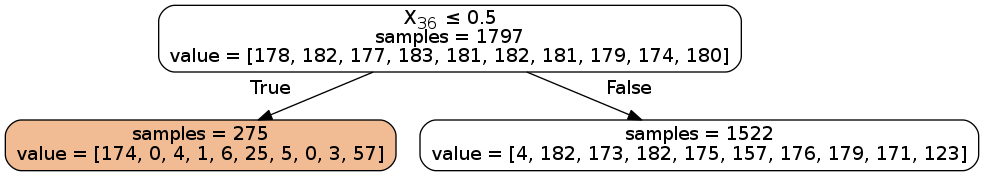

In [69]:
Image(graph.create_png())

## Second step (Depth=2)

In [70]:
dtree=DecisionTreeClassifier(max_depth=2)

In [73]:
dtree.fit(D.data,D.target)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph_val = remove_gini_impurity(dot_data.getvalue())
graph = pydotplus.graph_from_dot_data(graph_val) 

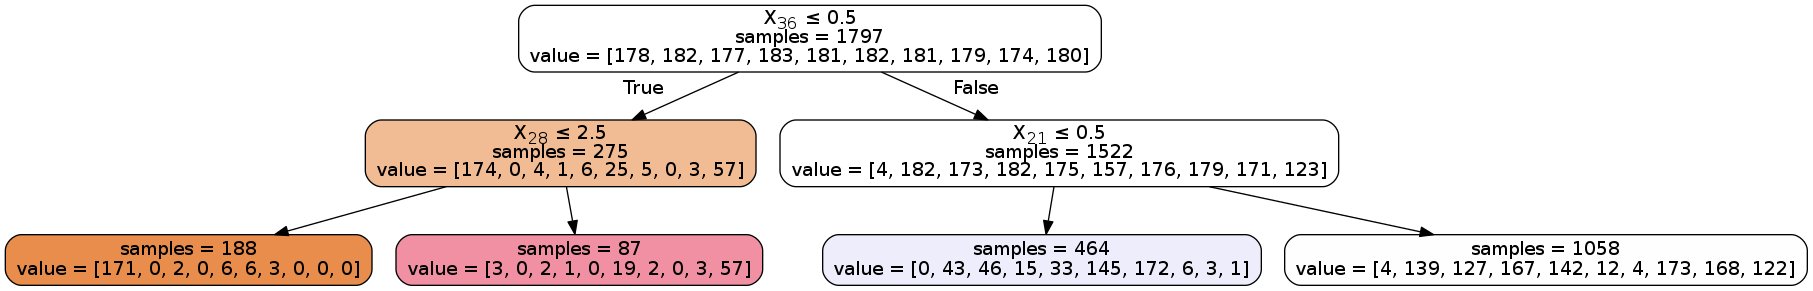

In [74]:
Image(graph.create_png())

### Observations
1. With the remaining samples, the condition X3 &le; 1.75 provides the best split between the two categories. 
2. There are however some outliers in each category of this classification.

## The Fully grown Decision Tree

In [75]:
dtree=DecisionTreeClassifier()

In [78]:
dtree.fit(D.data,D.target)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph_val = remove_gini_impurity(dot_data.getvalue())
graph = pydotplus.graph_from_dot_data(graph_val)  

In [79]:
Image(graph.create_png(),height=1500,width=900)

In [15]:
#Highlighting the over-fit portion

new_graph_val = """
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<X<SUB>3</SUB> &le; 1.55<br/>samples = 6<br/>value = [0, 2, 4]>, fillcolor="#8139e57f"] ;
1 [label=<samples = 3<br/>value = [0, 0, 3]>, fillcolor="#8139e5ff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>2</SUB> &le; 5.45<br/>samples = 3<br/>value = [0, 2, 1]>, fillcolor="#39e5817f"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<samples = 2<br/>value = [0, 2, 0]>, fillcolor="#39e581ff"] ;
2 -> 3 ;
4 [label=<samples = 1<br/>value = [0, 0, 1]>, fillcolor="#8139e5ff"] ;
2 -> 4 ;
}
""" 
graph = pydotplus.graph_from_dot_data(new_graph_val)

### Reducing Over-Fitting

* Use the **min_samples_split** parameter to set the minimum number of samples required to make a split. 

In [83]:
from sklearn.model_selection import cross_val_score
scores=[]
for i in range(1,100):
    dtree=DecisionTreeClassifier(max_depth=i)
    scores.append(np.mean(cross_val_score(dtree, D.data, D.target, cv=4)))

In [84]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


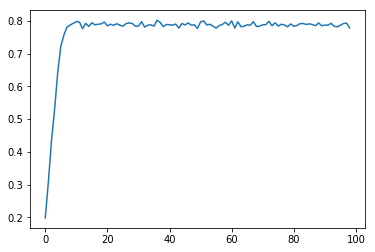

In [85]:
plot(scores)

In [88]:
from sklearn.model_selection import train_test_split
#(*arrays, **options)[source]
D_train, D_test, t_train, t_test = train_test_split(D.data, D.target, test_size=0.33, random_state=42)

In [111]:
dtree=DecisionTreeClassifier(max_depth=3)

In [112]:
dtree.fit(D_train,t_train)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph_val = remove_gini_impurity(dot_data.getvalue())
graph = pydotplus.graph_from_dot_data(graph_val) 

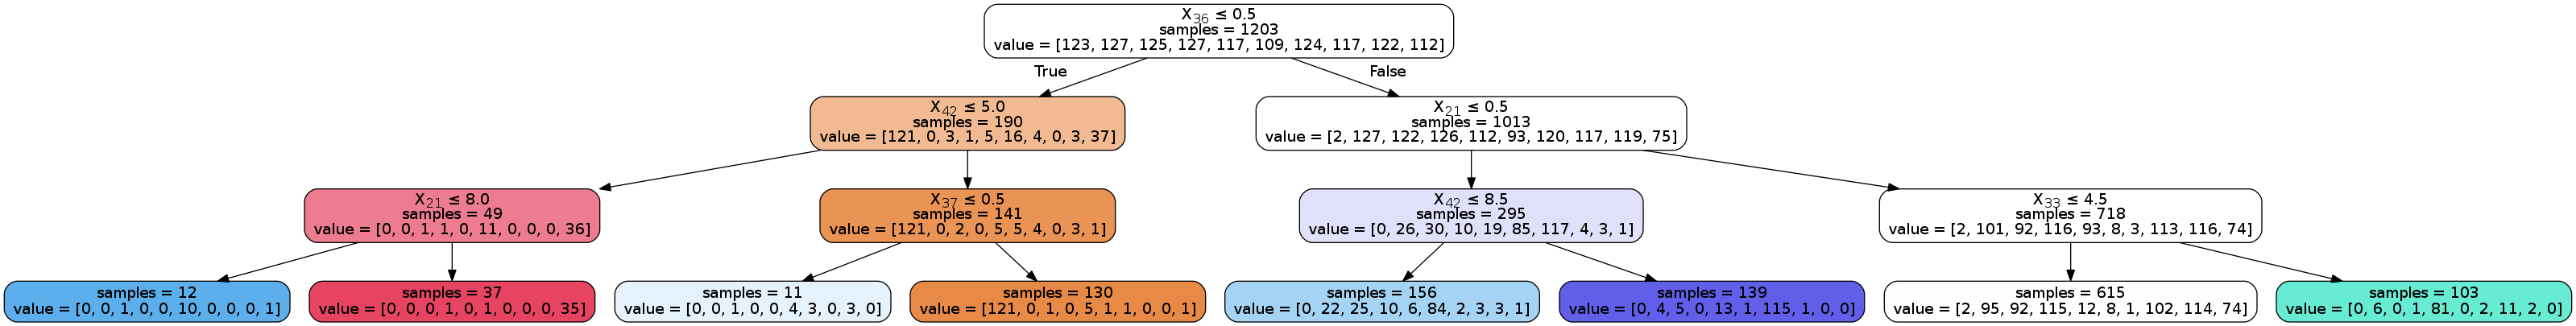

In [113]:
Image(graph.create_png(),height=1500,width=900)

**You are encouraged to explore the DecisionTreeCalssifier by altering parameters passed to it.**

In [114]:
def err(dtree,X,y):
    yp=dtree.predict(X)
    #print(type(X),type(y),type(yp))
    errs=np.sum(yp!=y)+0.0
    return(errs/len(X)) 

In [128]:
train_err=[]
test_err=[]
node_count=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(max_depth=i)
    dtree.fit(D_train,t_train)
    train_err.append(err(dtree,D_train,t_train)),
    test_err.append(err(dtree,D_test,t_test))
    node_count.append(dtree.tree_.node_count)

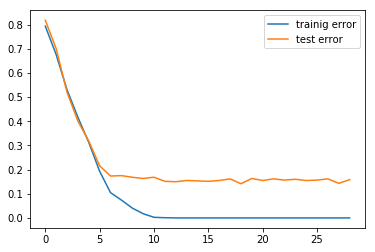

In [129]:
plot(train_err,label='trainig error')
plot(test_err,label='test error')
legend()

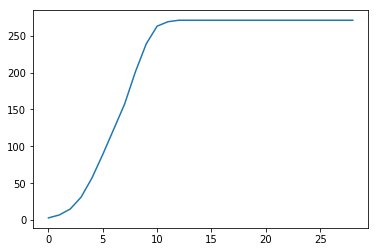

In [130]:
plot(node_count)

In [132]:
train_err[-10:]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [133]:
from sklearn.metrics import confusion_matrix

In [136]:
A=confusion_matrix(t_test,dtree.predict(D_test))

In [145]:
print('pred label  ',''.join(['%3d'%j for j in range(10)]))
for i in range(A.shape[0]):
    print('true label %d'%i,A[i,:])

pred label     0  1  2  3  4  5  6  7  8  9
true label 0 [52  0  0  0  1  1  0  0  1  0]
true label 1 [ 0 37  7  2  3  0  2  0  1  3]
true label 2 [ 0  1 46  3  0  0  0  0  2  0]
true label 3 [ 0  2  1 45  1  2  0  0  3  2]
true label 4 [ 1  3  0  1 51  0  5  2  0  1]
true label 5 [ 0  2  0  1  2 63  0  0  1  4]
true label 6 [ 0  0  0  0  1  0 55  1  0  0]
true label 7 [ 0  0  2  2  2  0  0 54  0  2]
true label 8 [ 1  3  0  3  0  0  0  0 42  3]
true label 9 [ 0  0  0  1  3  6  0  2  1 55]


### comments
* `1` is predicted as `2` 7 times
* `8,3,1' are confused with each other

In [147]:
choice=[1,3,8]
A[choice,:][:,choice]

array([[37,  2,  1],
       [ 2, 45,  3],
       [ 3,  3, 42]])